## importing required libs

In [131]:
import pandas as pd
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In this train dataset depending upon several independent features we need to predict the Price of flight tickets.

The train dataset is having 11 columns out of which 10 columns are the feature data and 1 column is the label variable.

Now we can see this dataset is having mainly nominal data and categorical data and only the label data is a continuous one, that means it is a regression type of problem.

In [3]:
test = pd.read_excel('Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This test dataset is having 10 independent features.

Like we have seen that test dataset is also having the same features except the dependent variable.

As the label column is missing, we will use this dataset after model training for testing purpose.

In [4]:
# checking the shapeof train data
train.shape

(10683, 11)

train dataset is containing 10683 rows and 11 columns.

In [5]:
# checking the shape of test data
test.shape

(2671, 10)

test dataset has 2671 rows and 10 columns

In [6]:
# getting the columns details of train dataset
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

train dataset is containing 11 columns outof which 10 are the independent columns and 1 columns is dependent column

In [7]:
# test datasert columns
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

test dataset is containing 10 columns and these columns are the independent variables and the label data is missing here, hence we can use this dataset after model creation using train dataset for prediction purpose.

In [8]:
# checking data type
train.dtypes


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

all the features are containing categorical or nominal data and only the target columns is having numerical data

In [9]:
# test datatypes
test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

all the columns are having categorical or nominal data

In [10]:
train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Different columns are containing different counts of categories like, Airline column is having 12 categories,means there are 12 different types of airlines present.

The label is containing 1870 price ranges and we have 10683 rows, it means airlines are having flights with same price ranges tickets also.

In [11]:
test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In test dataset different columns are containing different counts of categories like, Airline column is having 11 categories and so on.

In [12]:
# getting info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are 2 missing values present in the train dataset, one is in Route column and other is in Total stops column .

And all the features are containing object type of data. Only the label variable is having numerical data.

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


there is no missing value present in test dataset all the columns data are having object type of data

In [14]:
# checking null values
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 2 missing values present in the train dataset,one is in Route column and other is in Total stops column that we need to take care.

dropping those two data as it does not make much difference for this big dataset

In [15]:
train.dropna(inplace=True)


In [16]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

now there is no missing value present in the dataset

In [17]:
## checking test data for null values
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

this data is not having anyy missing value

## stat summary

In [18]:
train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


The label data of train dataset is containing continuous values.

Minimum price of a flight ticket is 1759 and maximum price is 79512. That is a big gap maybe skewness is present.


The difference of quartile 3 and maximum value is big. So, right skewness might be there.

In [19]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


There is no missing value present in the test dataset as the count is 2671.

Airline is having 11 categories of data out of which Jet Airways is the most preferable airline.

Travellers mostly use jet airways to go to Cochin from Delhi(as the frequency is same) where there is only one stop.

## Data Analysis

We will do Univariate Analysis to understand the distribution of continuous label and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.



## Univariate analysis

Min Price  1759
Max Price  79512


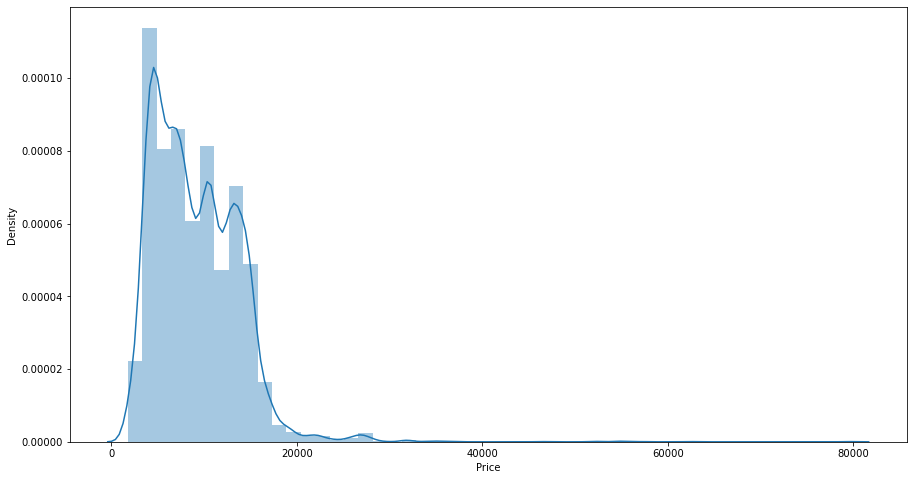

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(train['Price']);
print('Min Price ',train['Price'].min())
print('Max Price ',train['Price'].max())

the price of a flight ticket is ranging from 1759 to 79512the data is right skewed

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

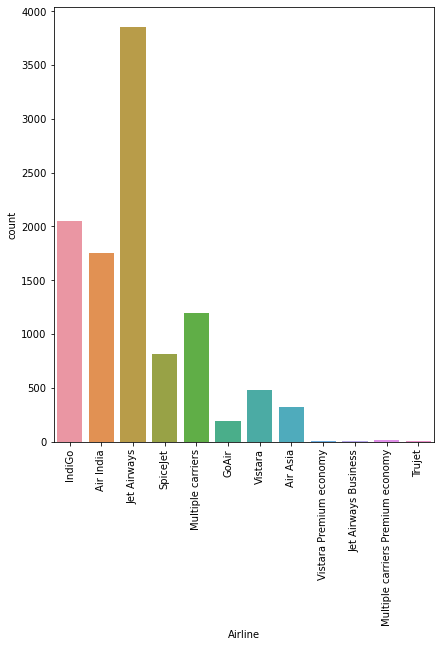

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(train['Airline'])
plt.xticks(rotation=90)
train['Airline'].value_counts()

the most preferable or highest flying airline is Jet Airways(3849) and least flying airline is trujet(1)

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

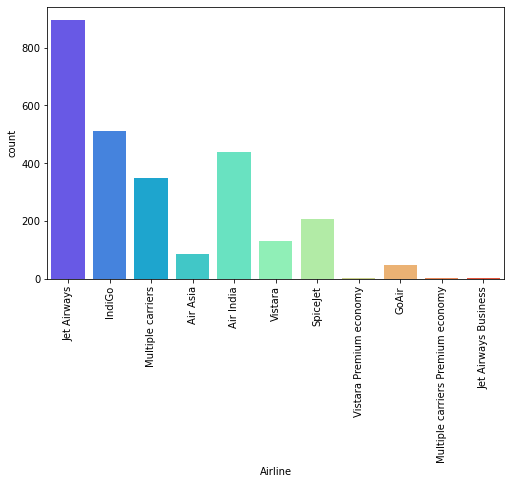

In [22]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(test['Airline'],palette='rainbow')
plt.xticks(rotation=90)
test['Airline'].value_counts()

 the most preferable or highest flying airline is Jet Airways ( 897 ) and least flying Jet Airways Business ( 2 ).

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

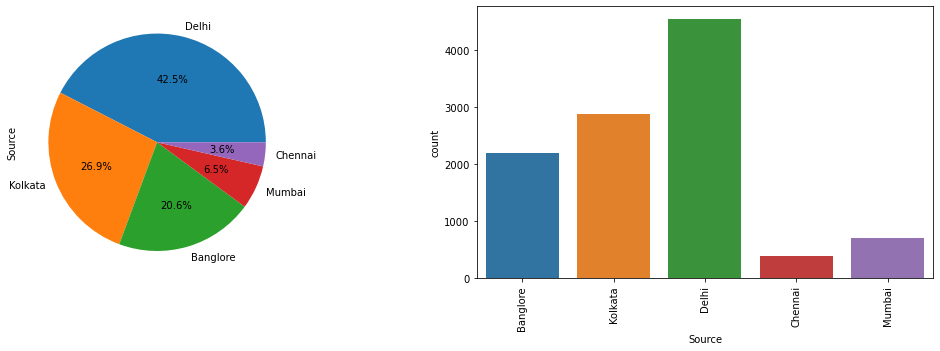

In [23]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
train['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Source'])
plt.xticks(rotation=90)
train['Source'].value_counts()

According to train dataset 42.5% of flights start their journey mainly from Delhi ( 4536 ) then kolkata ( 2871 ) and least count of flights (3.6%) start journey from Chennai ( 381 ).

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

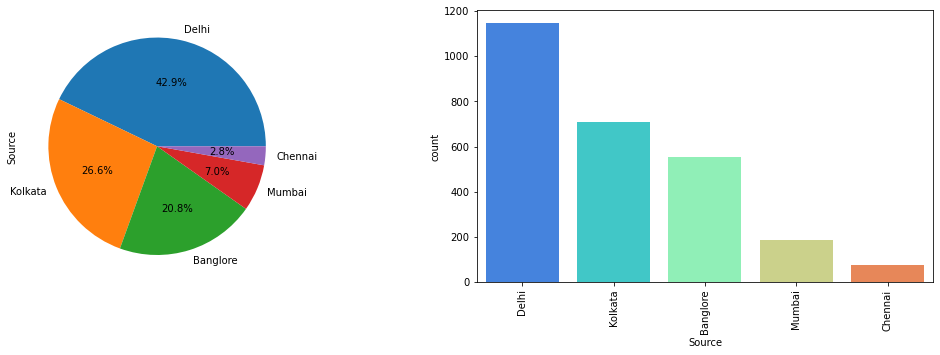

In [24]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
test['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Source'],palette='rainbow')
plt.xticks(rotation=90)
test['Source'].value_counts()

 dataset 42.9% of flight start their journey mainly from Delhi ( 1145 ) then kolkata ( 710 ) and least count of flights (2.8%) start journey from Chennai ( 75 ).

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

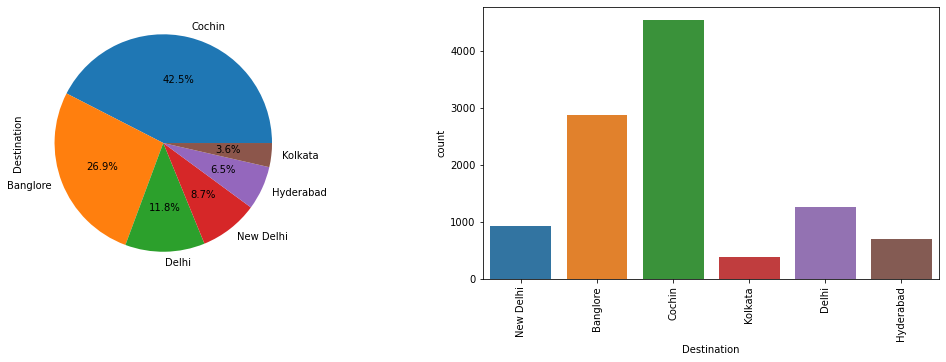

In [25]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
train['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Destination'])
plt.xticks(rotation=90)
train['Destination'].value_counts()

According to train dataset 42.5% of flights main destination is Cochin ( 4536 ) then Banglore ( 2871 ) and least count of flights (3.6%) travel to Kolkata ( 381 ).

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

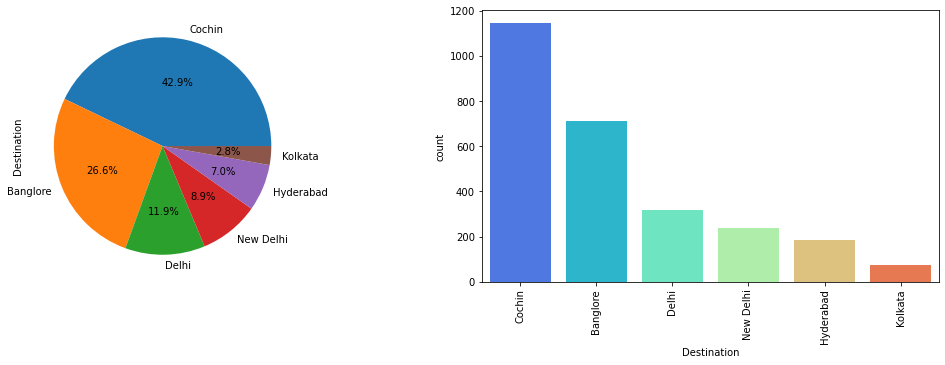

In [26]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
test['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Destination'],palette='rainbow')
plt.xticks(rotation=90)
test['Destination'].value_counts()

dataset 42.9% of flights main destination is Cochin ( 1145 ) then Banglore ( 710 ) and least count of flights (2.8%) are travelling to Kolkata ( 75 ).

In [27]:
train['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → JAI → DEL → HYD                   1
BLR → HBX → BOM → NAG → DEL             1
CCU → VTZ → BLR                         1
CCU → IXZ → MAA → BLR                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
Name: Route, Length: 128, dtype: int64

train dataset most using route by flight is DEL>BOM>COK(2376)

In [28]:
test['Route'].value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → UDR → DEL            1
BLR → BOM → IDR → DEL            1
BLR → VGA → DEL                  1
CCU → DEL → COK → TRV → BLR      1
CCU → PAT → BLR                  1
Name: Route, Length: 100, dtype: int64

same as train data set most using route by flight is DEL>BOM>COK(624)

In [29]:
train['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
22:25      1
04:15      1
01:35      1
04:50      1
16:25      1
Name: Dep_Time, Length: 222, dtype: int64

train data preferred Departure time is 18:55 0r 6:55

In [30]:
test['Dep_Time'].value_counts()

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
02:30     1
23:00     1
04:50     1
16:15     1
18:35     1
Name: Dep_Time, Length: 199, dtype: int64

test data preferred departure time is 10:00

In [31]:
train['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 19 Mar      1
10:50 07 Mar      1
02:10 22 Mar      1
14:35 25 May      1
11:10 07 May      1
Name: Arrival_Time, Length: 1343, dtype: int64

train dataset the most counts of flights arrive time is 19:00

In [32]:
test['Arrival_Time'].value_counts()

19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
05:25 07 Jun      1
07:55 13 May      1
07:45 02 Apr      1
04:25 20 May      1
00:20 02 Apr      1
Name: Arrival_Time, Length: 704, dtype: int64

test dataset the most counts of flights arrive time is 19:00

In [33]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
35h 20m      1
29h 30m      1
27h 55m      1
28h 30m      1
5m           1
Name: Duration, Length: 368, dtype: int64

train dataset most of the flights are mainly hovering for 2 hours 50mins the frequency of flights is less when duration is more

In [34]:
test['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
19h 45m      1
26h 50m      1
9h 55m       1
17h 40m      1
28h 55m      1
Name: Duration, Length: 320, dtype: int64

 test dataset, most of the flights are mainly hovering for 2 hours 50 minutes.

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

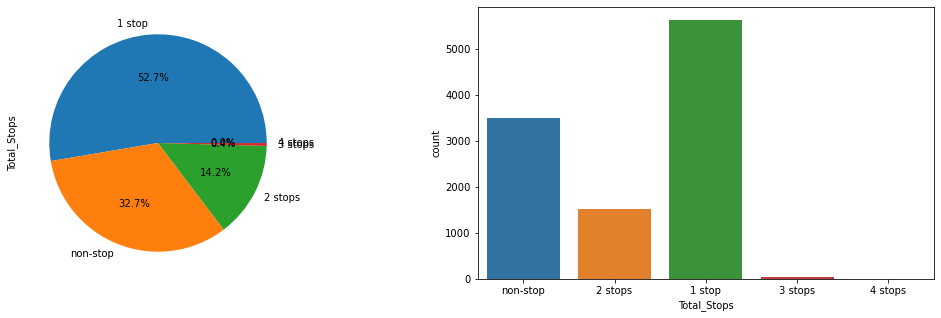

In [35]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
train['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Total_Stops'])
train['Total_Stops'].value_counts()

 train dataset, while travelling from one destination to another, there are some stops for the flights to refilling the fuel or depending upon the distance. There are 5 categories for that. Highest counts of flights stop for 1 stop 5625 (52.7%) and then there are non stop flights (for less distant destinations) and least count of flights stop for 4 stop only 1.

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

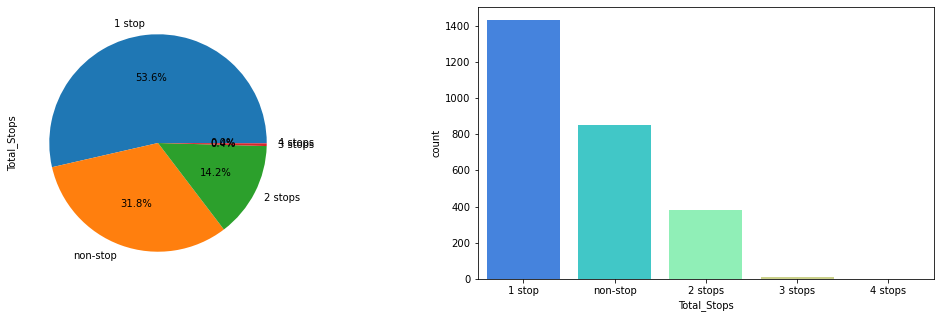

In [36]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
test['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Total_Stops'],palette='rainbow')
test['Total_Stops'].value_counts()

 test dataset, there are 5 categories of stops. Highest counts of flights stop for 1 stop 1431 ( 53.6% ) least count of flights stop for 4 stops only 1.

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

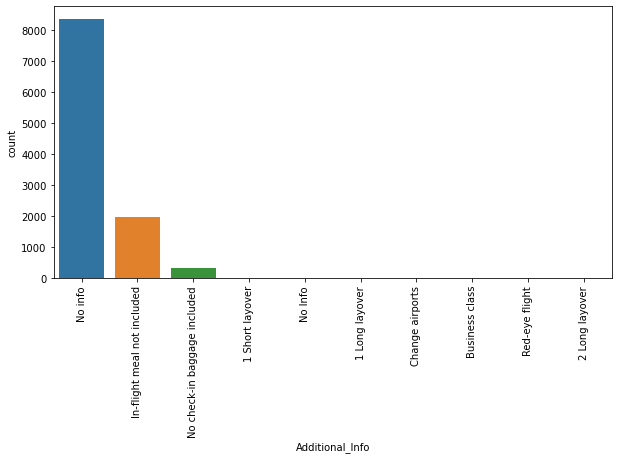

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(train['Additional_Info'])
plt.xticks(rotation=90)
train['Additional_Info'].value_counts()

 train dataset, Mostly flights have no additional information and the count is 8344. 2 Long layover is the least additional information and it counts 2

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

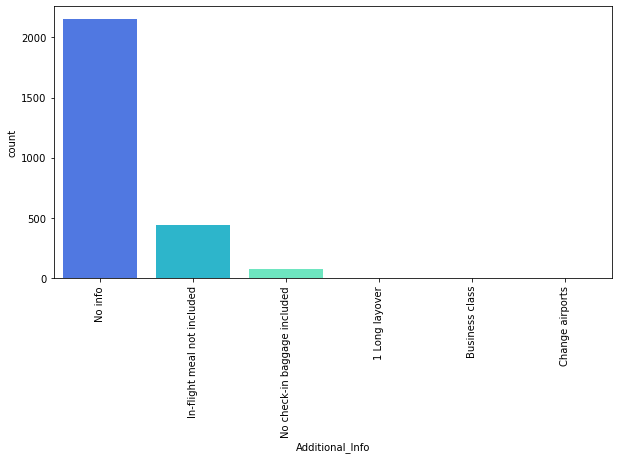

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(test['Additional_Info'],palette='rainbow')
plt.xticks(rotation=90)
test['Additional_Info'].value_counts()

test dataset, Mostly flights have no additional information and the count is 2148. Change airports is the least additional information and it counts only 1.

## Bivariate Analysis

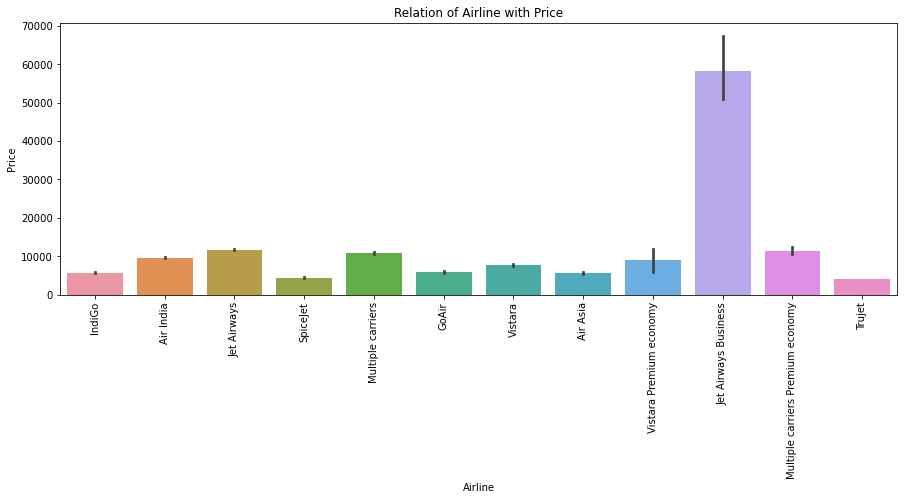

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x='Airline',y='Price',data=train).set_title('Relation of Airline with Price')
plt.xticks(rotation=90)
plt.show();

Jet Airways Business is the costliest of all the airlines according to train dataset. It costs 60,000 onwards. And Trujet and Spicejet are the least pricey airlines.

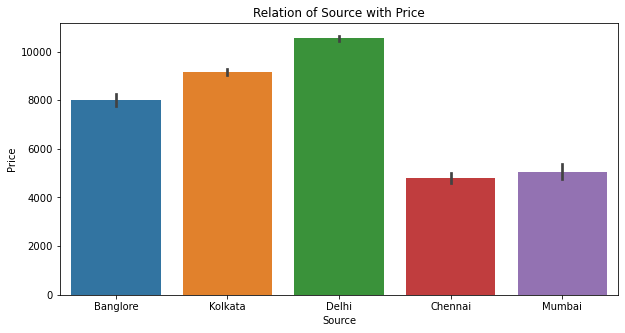

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x='Source',y='Price',data=train).set_title('Relation of Source with Price')
plt.show();


Flights take off from Delhi are the costliest ones. Whereas Flights take off from Chennai is more cost effective.

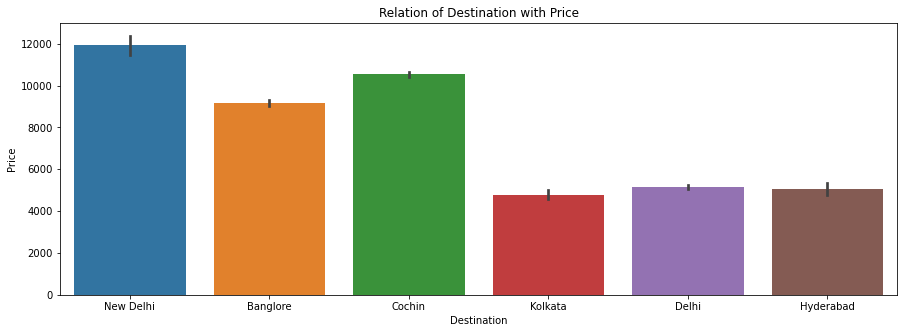

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='Destination',y='Price',data=train).set_title('Relation of Destination with Price')
plt.show()

Flights touch down New Delhi are the costliest ones, and 2nd costlier destination according to flight price is Cochin. Whereas Flights land to Kolkata are more cost effective

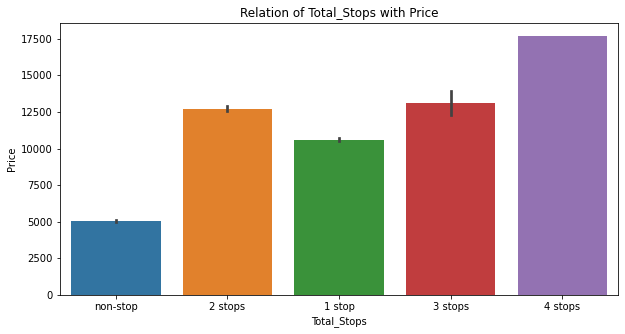

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total_Stops',y='Price',data=train).set_title('Relation of Total_Stops with Price')
plt.show()

flights with more stops are expensive

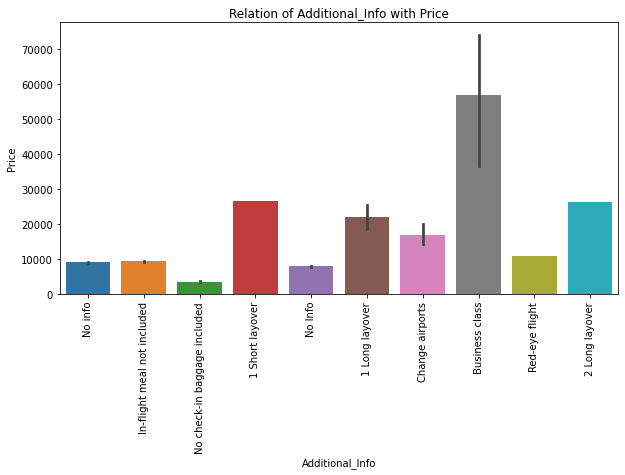

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='Additional_Info',y='Price',data=train).set_title('Relation of Additional_Info with Price')
plt.xticks(rotation=90)
plt.show();

Travelling by Business class is very expensive, And No check-in baggage included flights are cost effective.

## Multivariate Analysis

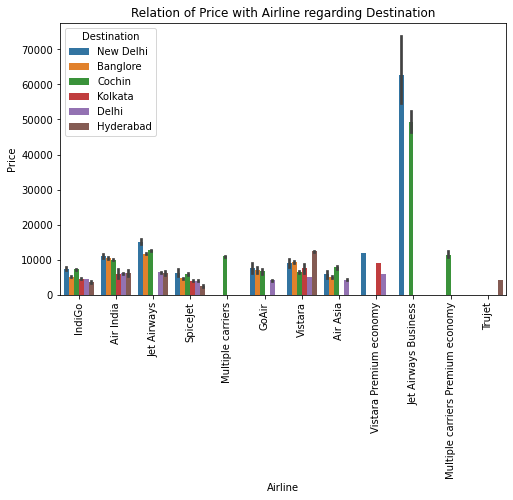

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Airline',y='Price',hue='Destination',data=train).set_title('Relation of Price with Airline regarding Destination')
plt.xticks(rotation=90)
plt.show();

travelling to New Delhi or Cochin by Jet Airways business is the costliest.

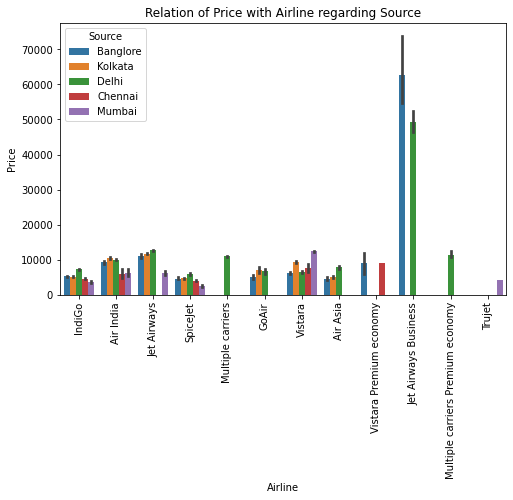

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='Airline',y='Price',hue='Source',data=train).set_title('Relation of Price with Airline regarding Source')
plt.xticks(rotation=90)
plt.show();

travelling from Delhi and Banglore by Jet Airways business is the costliest.

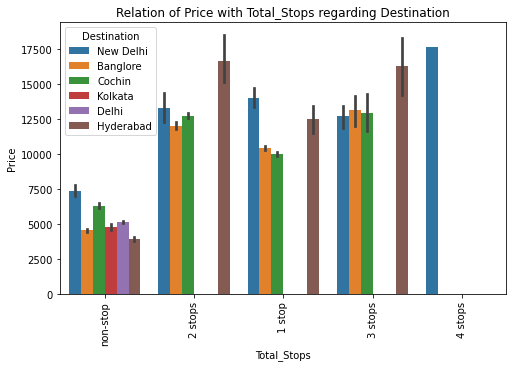

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(x='Total_Stops',y='Price',hue='Destination',data=train).set_title('Relation of Price with Total_Stops regarding Destination')
plt.xticks(rotation=90)
plt.show()

Non stop flights are more economical than flights those halt more.

## Data Engineering (Tran Data)

For making the data more simple and understandable we need to create new columns from existing columns.

In [47]:
# most of the columns are having nominaldata
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 1. Conversion of date_of_journey:
We are using date time module to make the date of journey column more simple and useful for the model.

In [48]:
# Creating 3 different columns for day, month and year data
train['year'] = pd.DatetimeIndex(train['Date_of_Journey']).year 
train['month'] = pd.DatetimeIndex(train['Date_of_Journey']).month 
train['day'] = pd.DatetimeIndex(train['Date_of_Journey']).day

In [49]:
# the train dataset is having 3 different column for day, month and year
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [50]:
#the Date_of_Journey column is not needed
train.drop(["Date_of_Journey"],axis = 1,inplace = True)

## 2.Conversion of the Dep_time:
We are using same date time module to make the Dep_time column more simple and useful for the model.


In [51]:
# Creating 2 different columns for hour and minutes data
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50


In [52]:
# Dropping the Dep_Time data as it's not needed
train.drop(["Dep_Time"],axis =1,inplace = True)

## 3.Conversion of Arrival_Time:
We are using same datetime module to make the Arrival_Time column more simple and useful for the model.

In [53]:
# Creating 2 different columns for hour and minutes from Arrival_Time data
train["Arrival_hour"]=pd.to_datetime(train.Arrival_Time).dt.hour
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


In [54]:
# Dropping the Arival_Time data as it's already separated into hours and minutes in two different columns
train.drop(["Arrival_Time"],axis = 1,inplace=True)

## 4. Conversion of duration:
The Duration column is not having the time data as time or date data were in Dep_Time or in Arrival time. The format is different. And for that we can not use datetime module. Hence we will make two different columns, duration_mins and duration_hours out of Duration column by iterating through forloops

In [55]:
duration = list(train["Duration"])# Assigning Duration column into list

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:           # if there 'h' present
            duration[i] = duration[i].strip() + " 0m"   # then Add 0 as minute
        else:
            duration[i] = "0h " + duration[i]           # Add 0 as hour

duration_hours = []  # the new duration_hours column after conversion
duration_mins = []   # the new duration_minutes column after conversion   
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracting  minutes from duration

In [56]:
#Adding the duration columns in the train dataset
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [57]:
#  As the Extraction is done, now we can drop the old Duration column
train.drop(["Duration"],axis=1,inplace=True)
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


day, month and year columns are made out of Date_of_journey, Dep_hour and Dep_min columns are made out of Dep_Time, Arrival_hour and Arrival_min columns are made out of Arrival_time and Duration_hours and Duration_mins are made out of Duration column of the train data. All the newly assign columns are looking more simple than before.

 the same thing with test data as well:

## Data Engineering (Test data ):
For making the data more simple and understandable we need to create new columns from existing columns.

In [58]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## 1. Conversion of Date_of_journey:
We are using date time module to make the date of journey column more simple and useful for the model prediction.

In [59]:
# Creating 3 different columns for day, month and year data
test['year'] = pd.DatetimeIndex(test['Date_of_Journey']).year 
test['month'] = pd.DatetimeIndex(test['Date_of_Journey']).month 
test['day'] = pd.DatetimeIndex(test['Date_of_Journey']).day

In [60]:
# Now the Date_of_Journey column is not needed
test.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [61]:
#the test dataset is having 3 different columns for day, month and year
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


## 2 .Conversion of the Dep_time:
We are using same date time module to make the Dep_time column more simple and useful for the model.

In [62]:
# Creating 2 different columns for hour and minutes data
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

In [63]:
# Dropping the Dep_Time data as it's not needed
test.drop(["Dep_Time"],axis = 1,inplace = True)

In [64]:
#the test dataset is having 2 more different columns Dep_hour and Dep_min
test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,2019,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,2019,5,21,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24,23,55


## 3.Conversion of Arrival_Time:
We are using same datetime module to make the Arrival_Time column more simple and useful for the model.

In [65]:
# Creating 2 different columns for hour and minutes from Arrival_Time data
test["Arrival_hour"]=pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute

# Dropping the Arival_Time data as it's already separated into hours and minutes in two different columns
test.drop(["Arrival_Time"],axis = 1,inplace = True)

In [66]:
#the test dataset is having 2 more different columns Arrival_hour ,Arrival_min
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,2019,6,24,23,55,2,45


## 4. Conversion of duration:
The Duration column is not having the time data as time or date data were in Dep_Time or in Arrival_time. The format is different. And for that we can not use datetime module. Hence, we will make two different columns, duration_mins and duration_hours out of Duration column by iterating through forloops

In [67]:
duration = list(test["Duration"])# Assigning Duration column into list

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:           # if there 'h' present
            duration[i] = duration[i].strip() + " 0m"   # then Add 0 as minute
        else:
            duration[i] = "0h " + duration[i]           # Add 0 as hour

duration_hours = []  # the new duration_hours column after conversion
duration_mins = []   # the new duration_minutes column after conversion   
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracting  minutes from duration

In [68]:
# Adding the duration columns in the train dataset
test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

In [69]:
# As the Extraction is done, now we can drop the old Duration column
test.drop(["Duration"],axis=1,inplace=True)
test.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,2019,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,2019,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,2019,6,24,23,55,2,45,2,50


day, month and year columns are made out of Date_of_journey, Dep_hour and Dep_min columns are made out of Dep_Time, Arrival_hour and Arrival_min columns are made out of Arrival_time and Duration_hours and Duration_mins are made out of Duration column of the test data. All the newly assign columns are looking more simple than before.

encoding of the nominal data of train dataset:

## Encoding of train dataset:
We are using get.dummies to encode the nominal data. Let's do it.

In [70]:
Airline = train[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


 we can see the nominal column Airline is encoded.

In [71]:
Source = train[["Source"]]
Source = pd.get_dummies(Source,drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


source column is also encoded into numerics

In [72]:
Destination = train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


Destination column is also encoded into numerics.

Encoding the Total_Stops column into serial numbers :

In [73]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,2019,1,3,16,50,21,35,4,45


As we can see, Total_stops column is encoded into serial numbers.


Let's drop those column which are not required.

In [74]:
#dropping Route and Additional_info columns
train.drop(["Route", "Additional_Info"],axis = 1,inplace = True)
train.head()

,Airline,Source,Destination,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,2019,1,3,16,50,21,35,4,45


In [75]:
#concat those prior encoded columns into train dataset
train=pd.concat([train, Airline, Source, Destination], axis = 1)

In [76]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,2019,3,24,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,2019,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,2019,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,2019,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,2019,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


 all the encoded columns are there in the dataset.

In [77]:
# dropping those old not encoded columns
train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [78]:
train.head()

,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2019,3,24,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,2019,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,2019,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,2019,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,2019,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


the dataset is looking better than before.

 encode the test dataset as well:

## Encoding of test dataset:

In [79]:
Airline = test[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [80]:
Source = test[["Source"]]
Source = pd.get_dummies(Source,drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [81]:
Destination = test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [82]:
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


# dropping those not useful columns
test.drop(["Route", "Additional_Info"],axis = 1,inplace = True)
test.head()

,Airline,Source,Destination,Total_Stops,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,2019,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,2019,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,2019,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,2019,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,2019,6,24,23,55,2,45,2,50


In [83]:
#concat those prior encoded columns into test dataset
test=pd.concat([test, Airline, Source, Destination], axis = 1)
test.head()

,Airline,Source,Destination,Total_Stops,year,month,day,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,2019,6,6,17,30,4,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,2019,12,5,6,20,10,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,2019,5,21,19,15,19,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,2019,5,21,8,0,21,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,2019,6,24,23,55,2,...,0,0,0,0,0,0,1,0,0,0


In [84]:
# dropping those old not encoded columns
test.drop(["Airline", "Source", "Destination"],axis = 1, inplace = True)
test.head()

,Total_Stops,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,2019,6,6,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,2019,12,5,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2019,5,21,19,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,2019,5,21,8,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2019,6,24,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


In [85]:
# There is a single data in year column let's drop it:
train.drop('year',axis=1,inplace=True)

# There is a single data in year column let's drop it:
test.drop('year',axis=1,inplace=True)

## Conclusion of Data engineering:
We have simplified the complex columns.

Encoded the nominal columns by using get.dummies.

Dropped unnnecessory columns.

## Checking Multicolinearity:
Let's find the coefficient of multicolinearty to check if any feature is corelated to another featue or not.

In [86]:
corr =train.corr()
corr.shape

(30, 30)

## Plotting heatmap (correlation matrix) :
Let's try to see if we can reduce the features of train dataset , using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity.

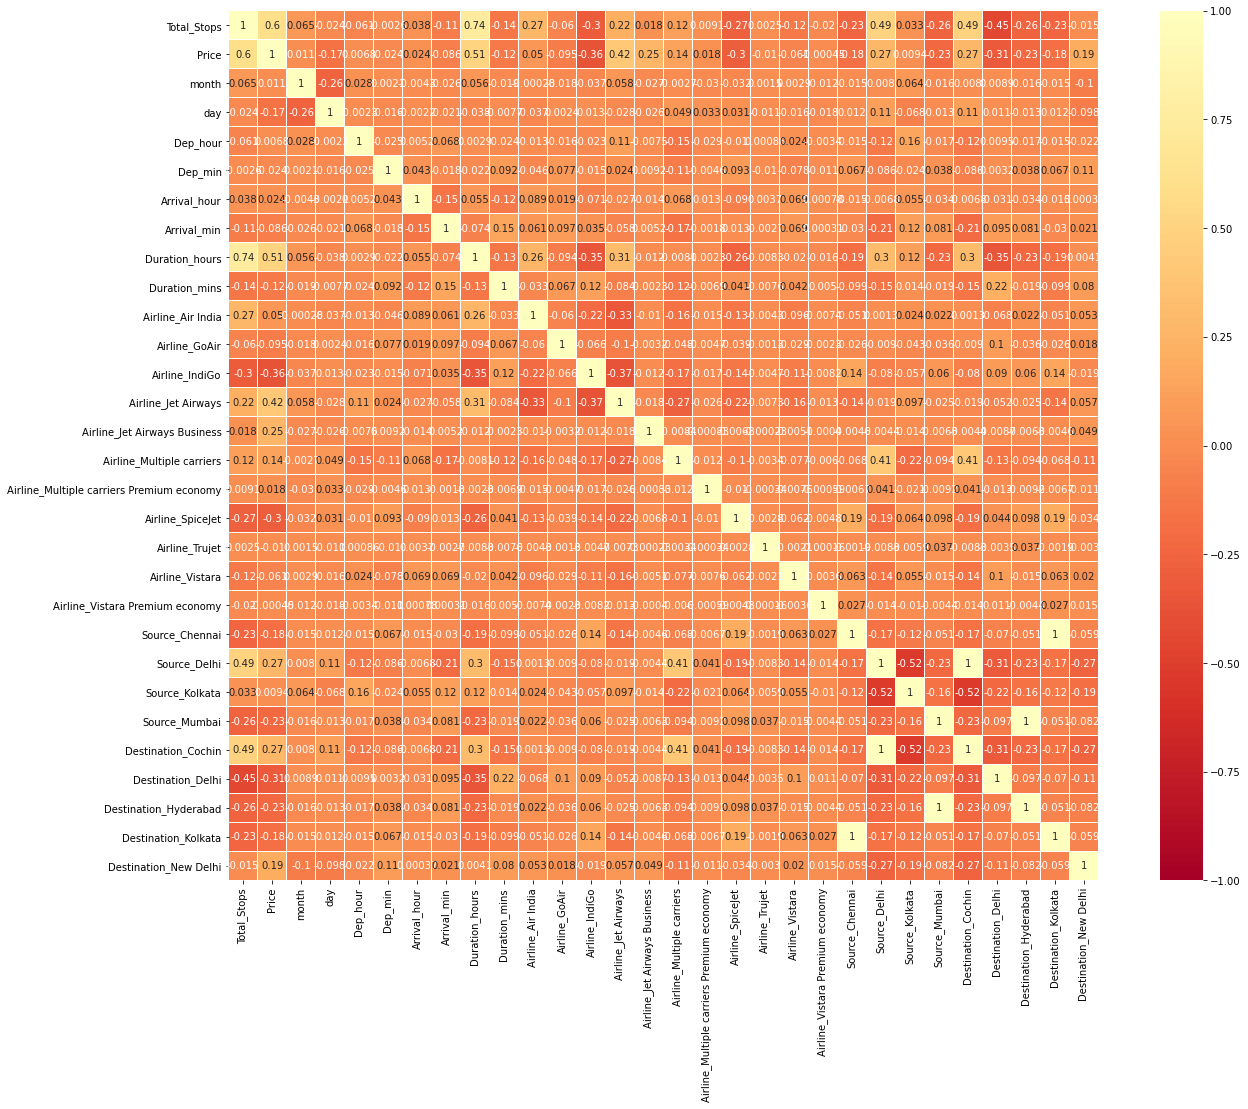

In [87]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='RdYlGn',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show();

In [88]:
# Dropping the correlated column from train dataset:
train.drop(["Destination_Cochin"],axis=1,inplace=True)

## Checking Multicolinearity:
Let's find the coefficient of multicolinearty to check if any feature is corelated to another featue or not in the test dataset.

In [89]:
corr1 = test.corr()
corr1.shape

(28, 28)

## Plotting heatmap (correlation matrix) 

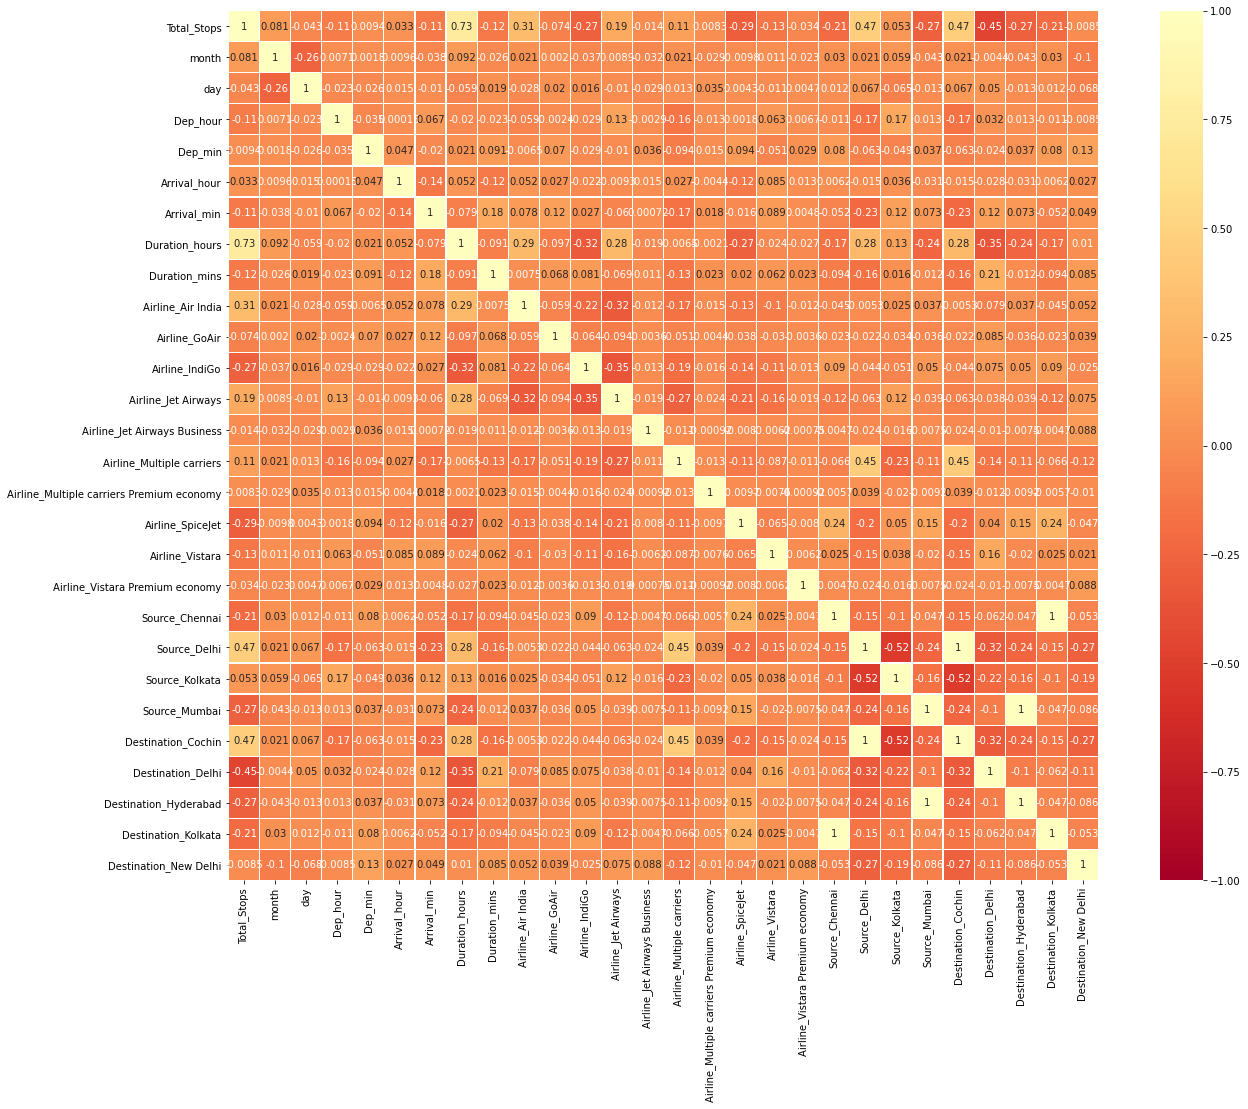

In [90]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr1,cbar=True,cmap='RdYlGn',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

## Feature Selection:
We will use SelectKBest feature selection to select the best features that have more influence on the label. Here in this dataset we are using Anova test by using f_classif. f_classif do some Anova test with the features and come up with the scores for every feature. Then comparing each feature score, most important top features are got selected by SelectKBest.

In [91]:
#using SelectKBestfeature selection method selectkbest use f_classif funtion to find best features where f_classif uses ANOVA test
from sklearn.feature_selection import SelectKBest,f_classif

In [92]:
train.head()

,Total_Stops,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [93]:
#drop the label from feature
x=train.drop('Price',axis=1)
y=train.Price

In [94]:
#now feature selection
best_features=SelectKBest(score_func=f_classif,k=20)
fit=best_features.fit(x,y)
df_score=pd.DataFrame(fit.scores_)  #.score_ will score the best 17 features in decending order
df_columns=pd.DataFrame(x.columns)

In [95]:
#concatinate the features with scores
feature_scores=pd.concat([df_columns,df_score],axis=1)
feature_scores.columns=['Feature_name','score']  #output column name
print(feature_scores.nlargest(25,'score'))

                                 Feature_name       score
13               Airline_Jet Airways Business         inf
15  Airline_Multiple carriers Premium economy         inf
17                             Airline_Trujet         inf
19            Airline_Vistara Premium economy         inf
18                            Airline_Vistara  346.062470
12                        Airline_Jet Airways  338.230569
21                               Source_Delhi  228.959956
23                              Source_Mumbai  224.438108
25                      Destination_Hyderabad  224.438108
14                  Airline_Multiple carriers  220.660520
0                                 Total_Stops  212.974577
20                             Source_Chennai  212.072625
26                        Destination_Kolkata  212.072625
22                             Source_Kolkata  201.903356
9                           Airline_Air India  157.323048
24                          Destination_Delhi   98.167350
27            

the descending order of important features. Although we are using all the features as the number of features are not more.

## Standardization:
We have already divided the dataset into features and label, lets standardize now:

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [97]:
x

,Total_Stops,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3,24,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,0,0,1,0,0,0,0,0
10679,0,4,27,20,45,23,20,2,35,1,...,0,0,0,0,1,0,0,0,0,0
10680,0,4,27,8,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,1,0,0,0,0,0,0,0,0,1


## time to create models

In [109]:
!pip install xgboost

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [129]:
## Importing machine learning Library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split


In [130]:
def maxr2_score(clf,X,Y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

## KNN Regressor:

max r2 score corresponding to 76 is 61.860279200752984


cross validation score 57.3378769753068


Standard Deviation 2.2808275976485004


Training accuracy 71.97113252531705


Test Accuracy 61.26808422373764


MAE 1851.2254562470753


MSE 7549761.516817969


RMSE 2747.6829360058937




76

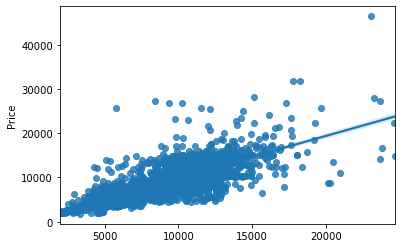

In [101]:
knn = KNeighborsRegressor()
maxr2_score(knn,x,y)

## Random Forest

max r2 score corresponding to 58 is 83.50318923265586


cross validation score 80.27191372683392


Standard Deviation 3.4276900611643777


Training accuracy 95.48755183433302


Test Accuracy 79.06497485061767


MAE 1226.6783965153809


MSE 4080728.8784638406


RMSE 2020.0814039201096




58

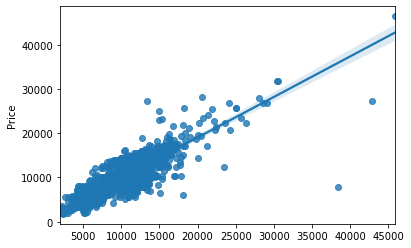

In [102]:
rf = RandomForestRegressor()
maxr2_score(rf,x,y)

## Gradient Boosting Regressor:

max r2 score corresponding to 79 is 81.12012088089651


cross validation score 77.47370629772202


Standard Deviation 1.6143058778673982


Training accuracy 79.44198438235168


Test Accuracy 77.6660378229592


MAE 1505.613765523322


MSE 4353414.613837162


RMSE 2086.483791894191




79

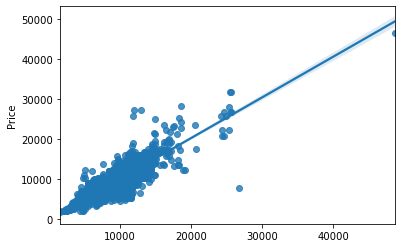

In [103]:
gbr = GradientBoostingRegressor()
maxr2_score(gbr,x,y)

## Decision Tree Regressor:

max r2 score corresponding to 94 is 78.62268445642968


cross validation score 69.75479218021363


Standard Deviation 6.3453024288182185


Training accuracy 97.20625164365646


Test Accuracy 63.9835494274331


MAE 1419.8132662611135


MSE 7020453.469843368


RMSE 2649.613834097974




94

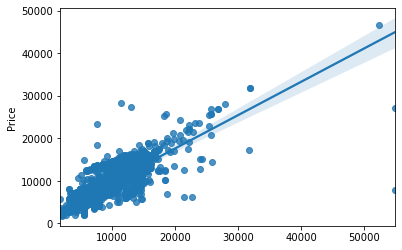

In [104]:
dt = DecisionTreeRegressor()
maxr2_score(dt,x,y)

## XGBRegressor

max r2 score corresponding to 44 is 86.92051984629092


cross validation score 83.34732855790641


Standard Deviation 2.23650620619599


Training accuracy 93.62460913173382


Test Accuracy 82.16323461513895


MAE 1213.2549097742162


MSE 3476805.1667009466


RMSE 1864.6193087869026




44

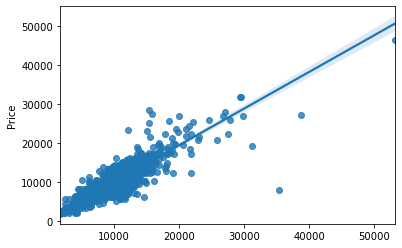

In [105]:
xgb=xgb.XGBRegressor()
maxr2_score(xgb,x,y)

XGBRegressor got best accuracy of 87%, hence, we are going to tune it's parameter to obtain best result.

## Hyperparameter Tuning:

In [112]:
xgbr = xgb.XGBRegressor()
grid_param= {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective':['reg:squarederror']}

In [117]:
gbr_search=GridSearchCV(xgbr,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(x_train,y_train)
gbr_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [136]:
xgbr= xgb.XGBRegressor(learning_rate=0.1,max_depth=7,colsample_bytree=0.5,n_estimators=200) 
xgbr.fit(x_train,y_train)
y_pred=xgbr.predict(x_test)

In [137]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
85.50834220056203


## the graph after hyperparameter tuning as well.

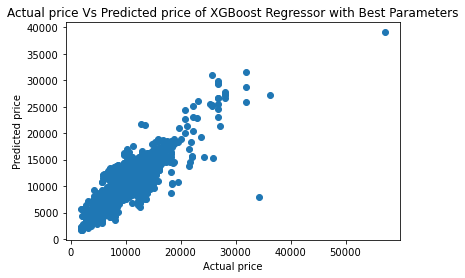

In [134]:
# Checking Actual sales Vs Predicted price using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of XGBoost Regressor with Best Parameters')
plt.show();

After hyperparameter tuning with best parameters of XGBoostRegressor is giving the best accuracy of 85.50%. So, we are going to use XGBoostRegressor Model for predicting price of test dataset.

In [138]:
X_test=test  # reinstantiating test column into a variable 

In [139]:
# Doing the prediction using the test dataset
xgbr.fit(x_train, y_train)
xgbr_pred = xgbr.predict(X_test)
score=xgbr.score(x_train,y_train)
print(score,xgbr,':')

0.9308704283066449 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :


 we can see it is giving almost 93% of accuracy.

In [140]:
#model(test dataset) prediction using gbr
x_predict = list(xgbr.predict(X_test))
df_new = {'predicted_values':x_predict[0:1000],'orignal_values':y_test[0:1000]}
print(pd.DataFrame(df_new))

      predicted_values  orignal_values
6075      11310.938477           16655
3544       5258.317383            4959
9291      13065.631836            9187
5032      10851.036133            3858
2483       4046.609375           12898
...                ...             ...
590        2957.937988            8586
5613       6674.020020           13469
3958       8876.697266            5298
5245       3628.694092           15107
8458      10538.740234           10262

[1000 rows x 2 columns]


## save the model.

In [141]:
import joblib
joblib.dump(xgbr,'xgbr_flight_price_pred.pkl')

['xgbr_flight_price_pred.pkl']

## testing the saved model

In [142]:
loaded_model=joblib.load('xgbr_flight_price_pred.pkl')
prediction=loaded_model.predict(X_test)

In [143]:
prediction

array([11310.938 ,  5258.3174, 13065.632 , ..., 17998.346 , 11870.466 ,
        8331.707 ], dtype=float32)

### ;) Done ###